Topic:        Challenge Set 6 <br />
Subject:      Linear Regression and Learning Curve challenges <br />
Date:         04/30/2018 <br />
Name:         Ben Sturm <br />

### Challenge 1

Generate (fake) data that is linearly related to log(x).

You are making this model up. It is of the form B0 + B1*log(x) + epsilon. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

    quadratic (second degree polynomial)
    logarithmic (log(x))

(The second one should fit really well, since it has the same form as the underlying model!)

In [41]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [47]:
# Generate some data
s = 300
x = np.random.uniform(low=0, high=10, size=s)
ep = np.random.randn(s)
beta0 = 6
beta1 = 2
y = beta0 + beta1*np.log(x) + ep

In [48]:
y.shape

(300,)

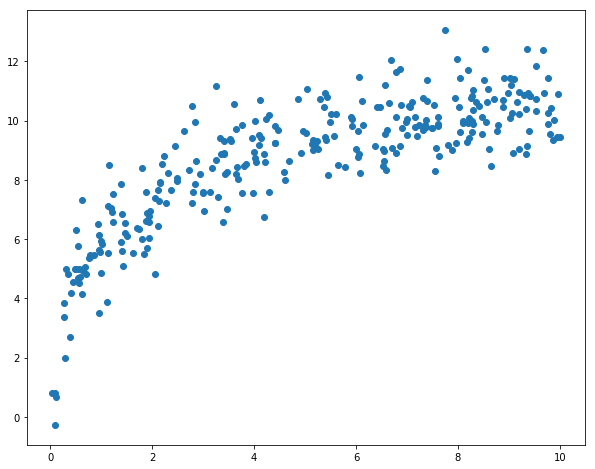

In [49]:
plt.figure(figsize=(10,8))
plt.plot(x,y,'o')

Now we fit this data to a second degree polynomial of the form B0 + B1*x + B2*x^2

First we have to generate our features x and x^2.  We will combine them and call it X.
    

In [50]:
x = x.reshape(-1,1)
x_squared = x**2
X = np.concatenate((x,x_squared),axis=1)
X.shape

(300, 2)

In [51]:
y.shape

(300,)

In [52]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X,y)

In [54]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [ 1.65395015 -0.10555377]
lr.intercept_: 3.9290190903608053


In [55]:
print("Second degree polynomial score: {:.2f}".format(lr.score(X,y)))

Second degree polynomial score: 0.77


Now we fit this data to a logarithmic function.

In [57]:
logx = np.log(x).reshape(-1,1)

In [58]:
lr2 = LinearRegression().fit(logx,y)

In [60]:
print("lr.coef_: {}".format(lr2.coef_))
print("lr.intercept_: {}".format(lr2.intercept_))

lr.coef_: [2.06347106]
lr.intercept_: 5.951021569304453


In [62]:
print("Logarithmic model score: {:.2f}".format(lr2.score(logx,y)))

Logarithmic model score: 0.82


As we would expect, the logarithmic model fits the data better.

### Challenge 2

Generate (fake) data from a model of the form B0 + B1*x + B2*x^2 + epsilon. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use sklearn.metrics.mean_squared_error.)

In [143]:
# Generate some more fake data
s = 300
x2 = np.random.uniform(low=0, high=10, size=s)
ep = 4*np.random.randn(s)
beta0 = 1
beta1 = 0.5
beta2 = 0.35
y2 = beta0 + beta1*x2 + beta2*x2**2 + ep

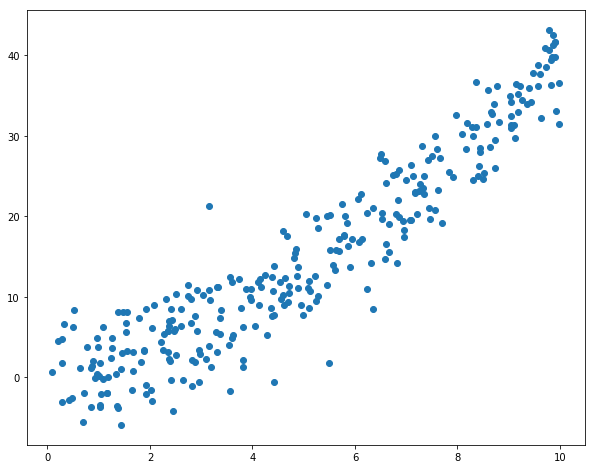

In [144]:
plt.figure(figsize=(10,8))
plt.plot(x2,y2,'o')

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

First we have to generate our features x and x^2. We will combine them and call it X.

In [146]:
x2 = x2.reshape(-1,1)
x2_squared = x2**2
X2 = np.concatenate((x2,x2_squared),axis=1)
X2.shape

(300, 2)

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, random_state=7)

In [162]:
lr3 = LinearRegression().fit(X_train,y_train)

First I'm interested in examining the R^2 score for the training and test sets.

In [163]:
print("Training set score: {:.3f}".format(lr3.score(X_train, y_train)))
print("Test set score: {:.3f}".format(lr3.score(X_test, y_test)))

Training set score: 0.908
Test set score: 0.883


Now I'd like to check on the mean square error.

In [164]:
y_train_predict = lr3.predict(X_train)
y_test_predict = lr3.predict(X_test)

In [165]:
print("Training set mean square error: {:.2f}".format(mean_squared_error(y_train, y_train_predict)))
print("Test set mean square error: {:.2f}".format(mean_squared_error(y_test, y_test_predict)))


Training set mean square error: 13.85
Test set mean square error: 18.12


### Challenge 3

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

    training error
    test error
    R squared
    AIC


In [166]:
from sklearn.preprocessing import PolynomialFeatures

In [167]:
def get_poly(X,degree):
    poly = PolynomialFeatures(degree)
    poly.fit(X)
    X_poly = poly.transform(X)
    
    return X_poly

In [168]:
def get_fit_data(X_poly,y):
    lr = LinearRegression().fit(X_poly,y)
    
    return lr.score(X_poly,y)

In [169]:
def get_lr_model(X_poly,y):
    lr = LinearRegression().fit(X_poly,y)
    
    return lr

In [170]:
X_train2 = X_train[:,0].reshape(-1,1)
X_poly = get_poly(X_train2,5)
get_fit_data(X_poly,y_train)

0.9083278130932327

In [171]:
X_train2 = X_train[:,0].reshape(-1,1)
X_test2 = X_test[:,0].reshape(-1,1)
train_score_list = []
test_score_list = []
for i in range(8):
    X_poly_train = get_poly(X_train2,i)
    X_poly_test = get_poly(X_test2,i)
    lr = get_lr_model(X_poly_train,y_train)
    train_score = lr.score(X_poly_train,y_train)
    test_score = lr.score(X_poly_test,y_test)
    train_score_list.append(train_score)
    test_score_list.append(test_score)

In [172]:
train_score_list

[0.0,
 0.8836540295374694,
 0.9080278245206596,
 0.9080279269060144,
 0.9080289796857308,
 0.9083278130932327,
 0.9101522491289885,
 0.9102158024347181]

In [173]:
test_score_list

[-0.014814514608031848,
 0.8484626658746381,
 0.8825260828730972,
 0.8825049810260835,
 0.88257269420107,
 0.8811896141977212,
 0.8747223659924791,
 0.8760152392243594]

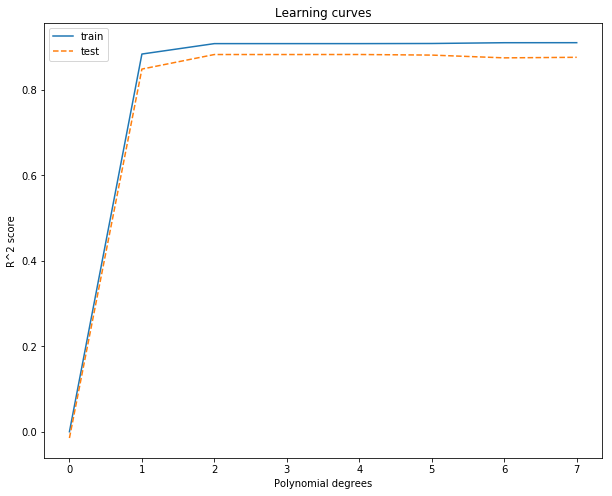

In [179]:
plt.figure(figsize=(10,8))
deg = np.arange(0,8)
plt.plot(deg,train_score_list,'-',label='train')
plt.plot(deg,test_score_list,'--',label='test')
plt.xlabel('Polynomial degrees')
plt.ylabel('R^2 score')
plt.title('Learning curves')
plt.legend()